<a href="https://colab.research.google.com/github/mohammadRahimi1993/BigData/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DataSet Understand**

# 1.1 import Libraries


In [13]:
# Load Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)
from matplotlib.colors import ListedColormap
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import stats
from scipy.stats import norm
from scipy.stats import probplot
import scipy as stat
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import PowerTransformer
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA


# 1.2 import Dataset

In [14]:
df = pd.read_csv("/content/drive/MyDrive/DataSet/loan_data_class.csv")
df = pd.DataFrame(df)
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


# 1.3 Descriptive Analysis

In [15]:
describe = df.describe().T
print(describe)

                    count          mean           std         min  \
credit.policy      9578.0      0.804970      0.396245    0.000000   
int.rate           9578.0      0.122640      0.026847    0.060000   
installment        9578.0    319.089413    207.071301   15.670000   
log.annual.inc     9578.0     10.932117      0.614813    7.547502   
dti                9578.0     12.606679      6.883970    0.000000   
fico               9578.0    710.846314     37.970537  612.000000   
days.with.cr.line  9578.0   4560.767197   2496.930377  178.958333   
revol.bal          9578.0  16913.963876  33756.189557    0.000000   
revol.util         9578.0     46.799236     29.014417    0.000000   
inq.last.6mths     9578.0      1.577469      2.200245    0.000000   
delinq.2yrs        9578.0      0.163708      0.546215    0.000000   
pub.rec            9578.0      0.062122      0.262126    0.000000   
not.fully.paid     9578.0      0.160054      0.366676    0.000000   

                           25%   

# 1.4 Checking Skewness Basically

In [16]:
def check_skewness(dataframe):

    global describe
    
    for i in range(describe.shape[1]):
        mean = round(describe.iloc[1,i],3)
        median = round(describe.iloc[5,i],3)
    
        if mean > median:
            print("Positive Skewness\t:\t{}\t".format(describe.columns[i]))
        elif mean == median:
            print("No Skew          \t:\t{}\t".format(describe.columns[i]))
        else:
            print("Negative Skewness\t:\t{}\t".format(describe.columns[i]))
            
check_skewness(df)

No Skew          	:	count	
Negative Skewness	:	mean	
Negative Skewness	:	std	
Negative Skewness	:	min	
Negative Skewness	:	25%	
Negative Skewness	:	50%	
Negative Skewness	:	75%	
Negative Skewness	:	max	


# 1.5 Missing Values

In [17]:
#df.info()
def Missing_Values_Table(df):
    missing_value = df.isnull().sum()
    missing_value_percent = 100*df.isnull().sum()/len(df)
    missing_value_table = pd.concat([missing_value,missing_value_percent],axis = 1)
    missing_value_table__ = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Percent'})
    return missing_value_table__

Missing_Values_Table(df)

,Missing Values,% Percent
credit.policy,0,0.0
purpose,0,0.0
int.rate,0,0.0
installment,0,0.0
log.annual.inc,0,0.0
dti,0,0.0
fico,0,0.0
days.with.cr.line,0,0.0
revol.bal,0,0.0
revol.util,0,0.0


In [24]:
df = df.rename(columns = {"purpose":"Target"})

df['Target'] = df['Target'].replace(['all_other'], 0)
df['Target'] = df['Target'].replace(['debt_consolidation'], 1)
df['Target'] = df['Target'].replace(['credit_card'], 2)
df['Target'] = df['Target'].replace(['educational'], 3)
df['Target'] = df['Target'].replace(['home_improvement'], 4)
df['Target'] = df['Target'].replace(['major_purchase'], 5)
df['Target'] = df['Target'].replace(['small_business'], 6)

df.head(5)

,credit.policy,Target,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# 1.6 Correlation Matrix

Text(0.5, 1.0, 'Correlation Features')

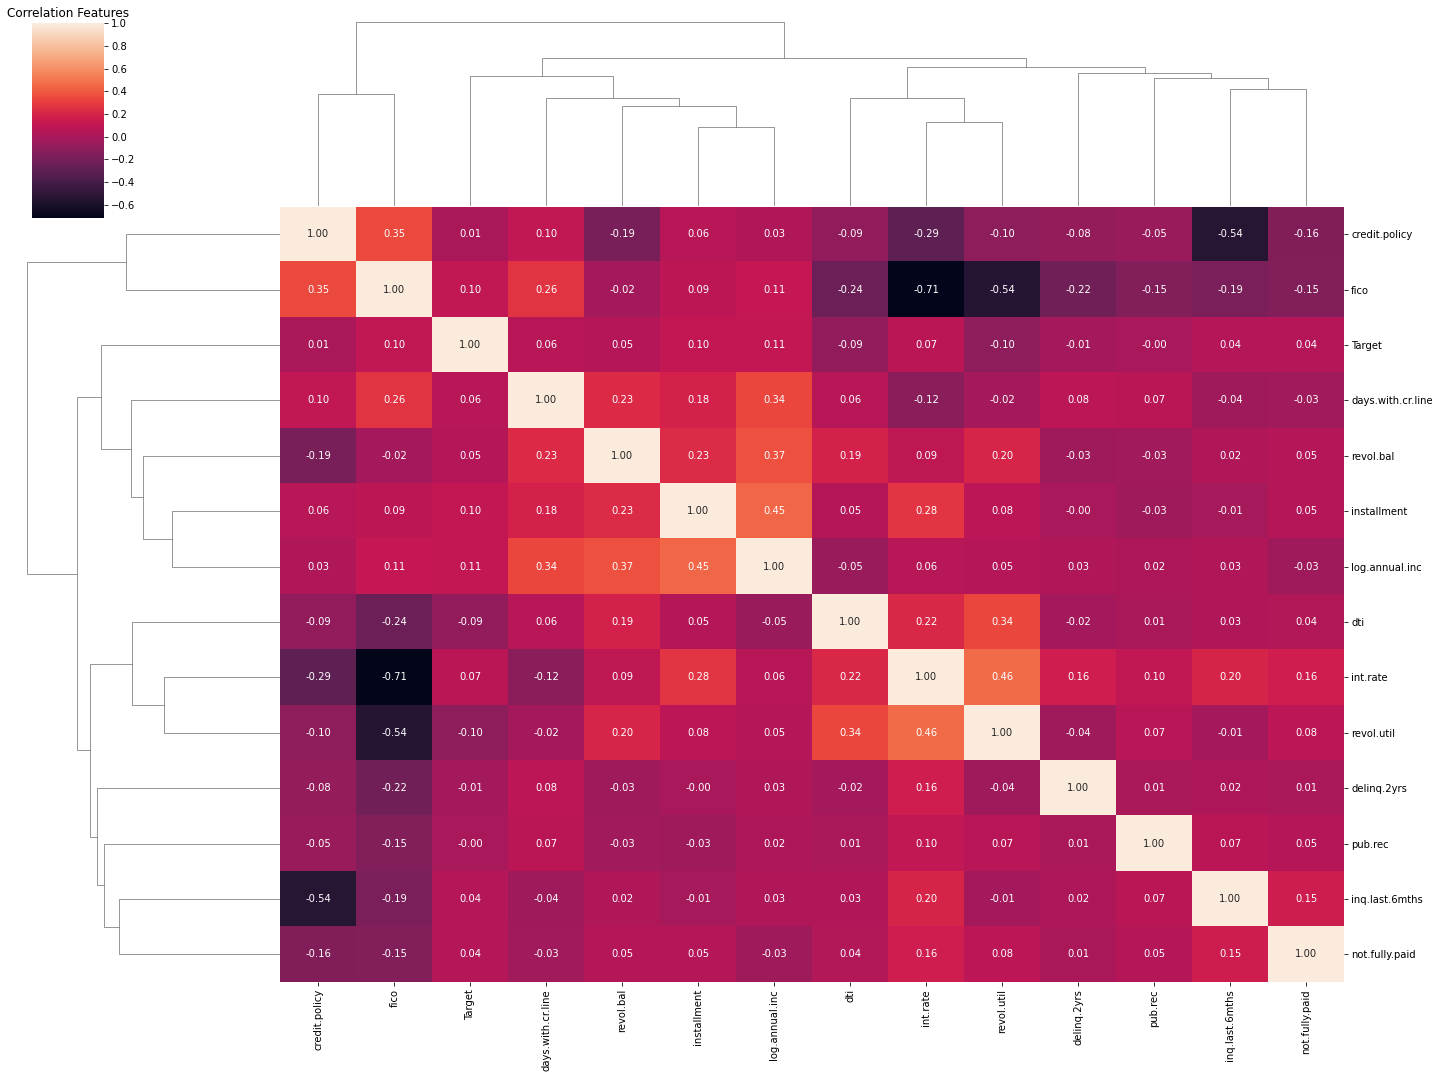

In [25]:
# correlation:
corr_matrix = df.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f",figsize=(20,15))
plt.title("Correlation Features")

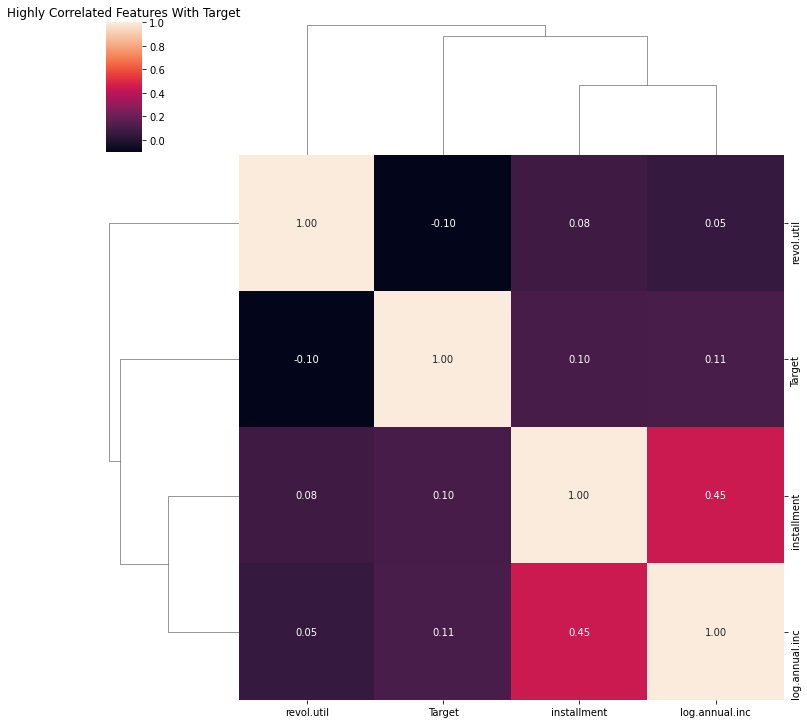

In [28]:
thrs = 0.1
filt = np.abs(corr_matrix["Target"])>=thrs
correlation_features = corr_matrix.columns[filt].tolist()
sns.clustermap(df[correlation_features].corr(),annot = True, fmt = ".2f")
plt.title("Highly Correlated Features With Target")
plt.show()

# 1.7 Pair Plot

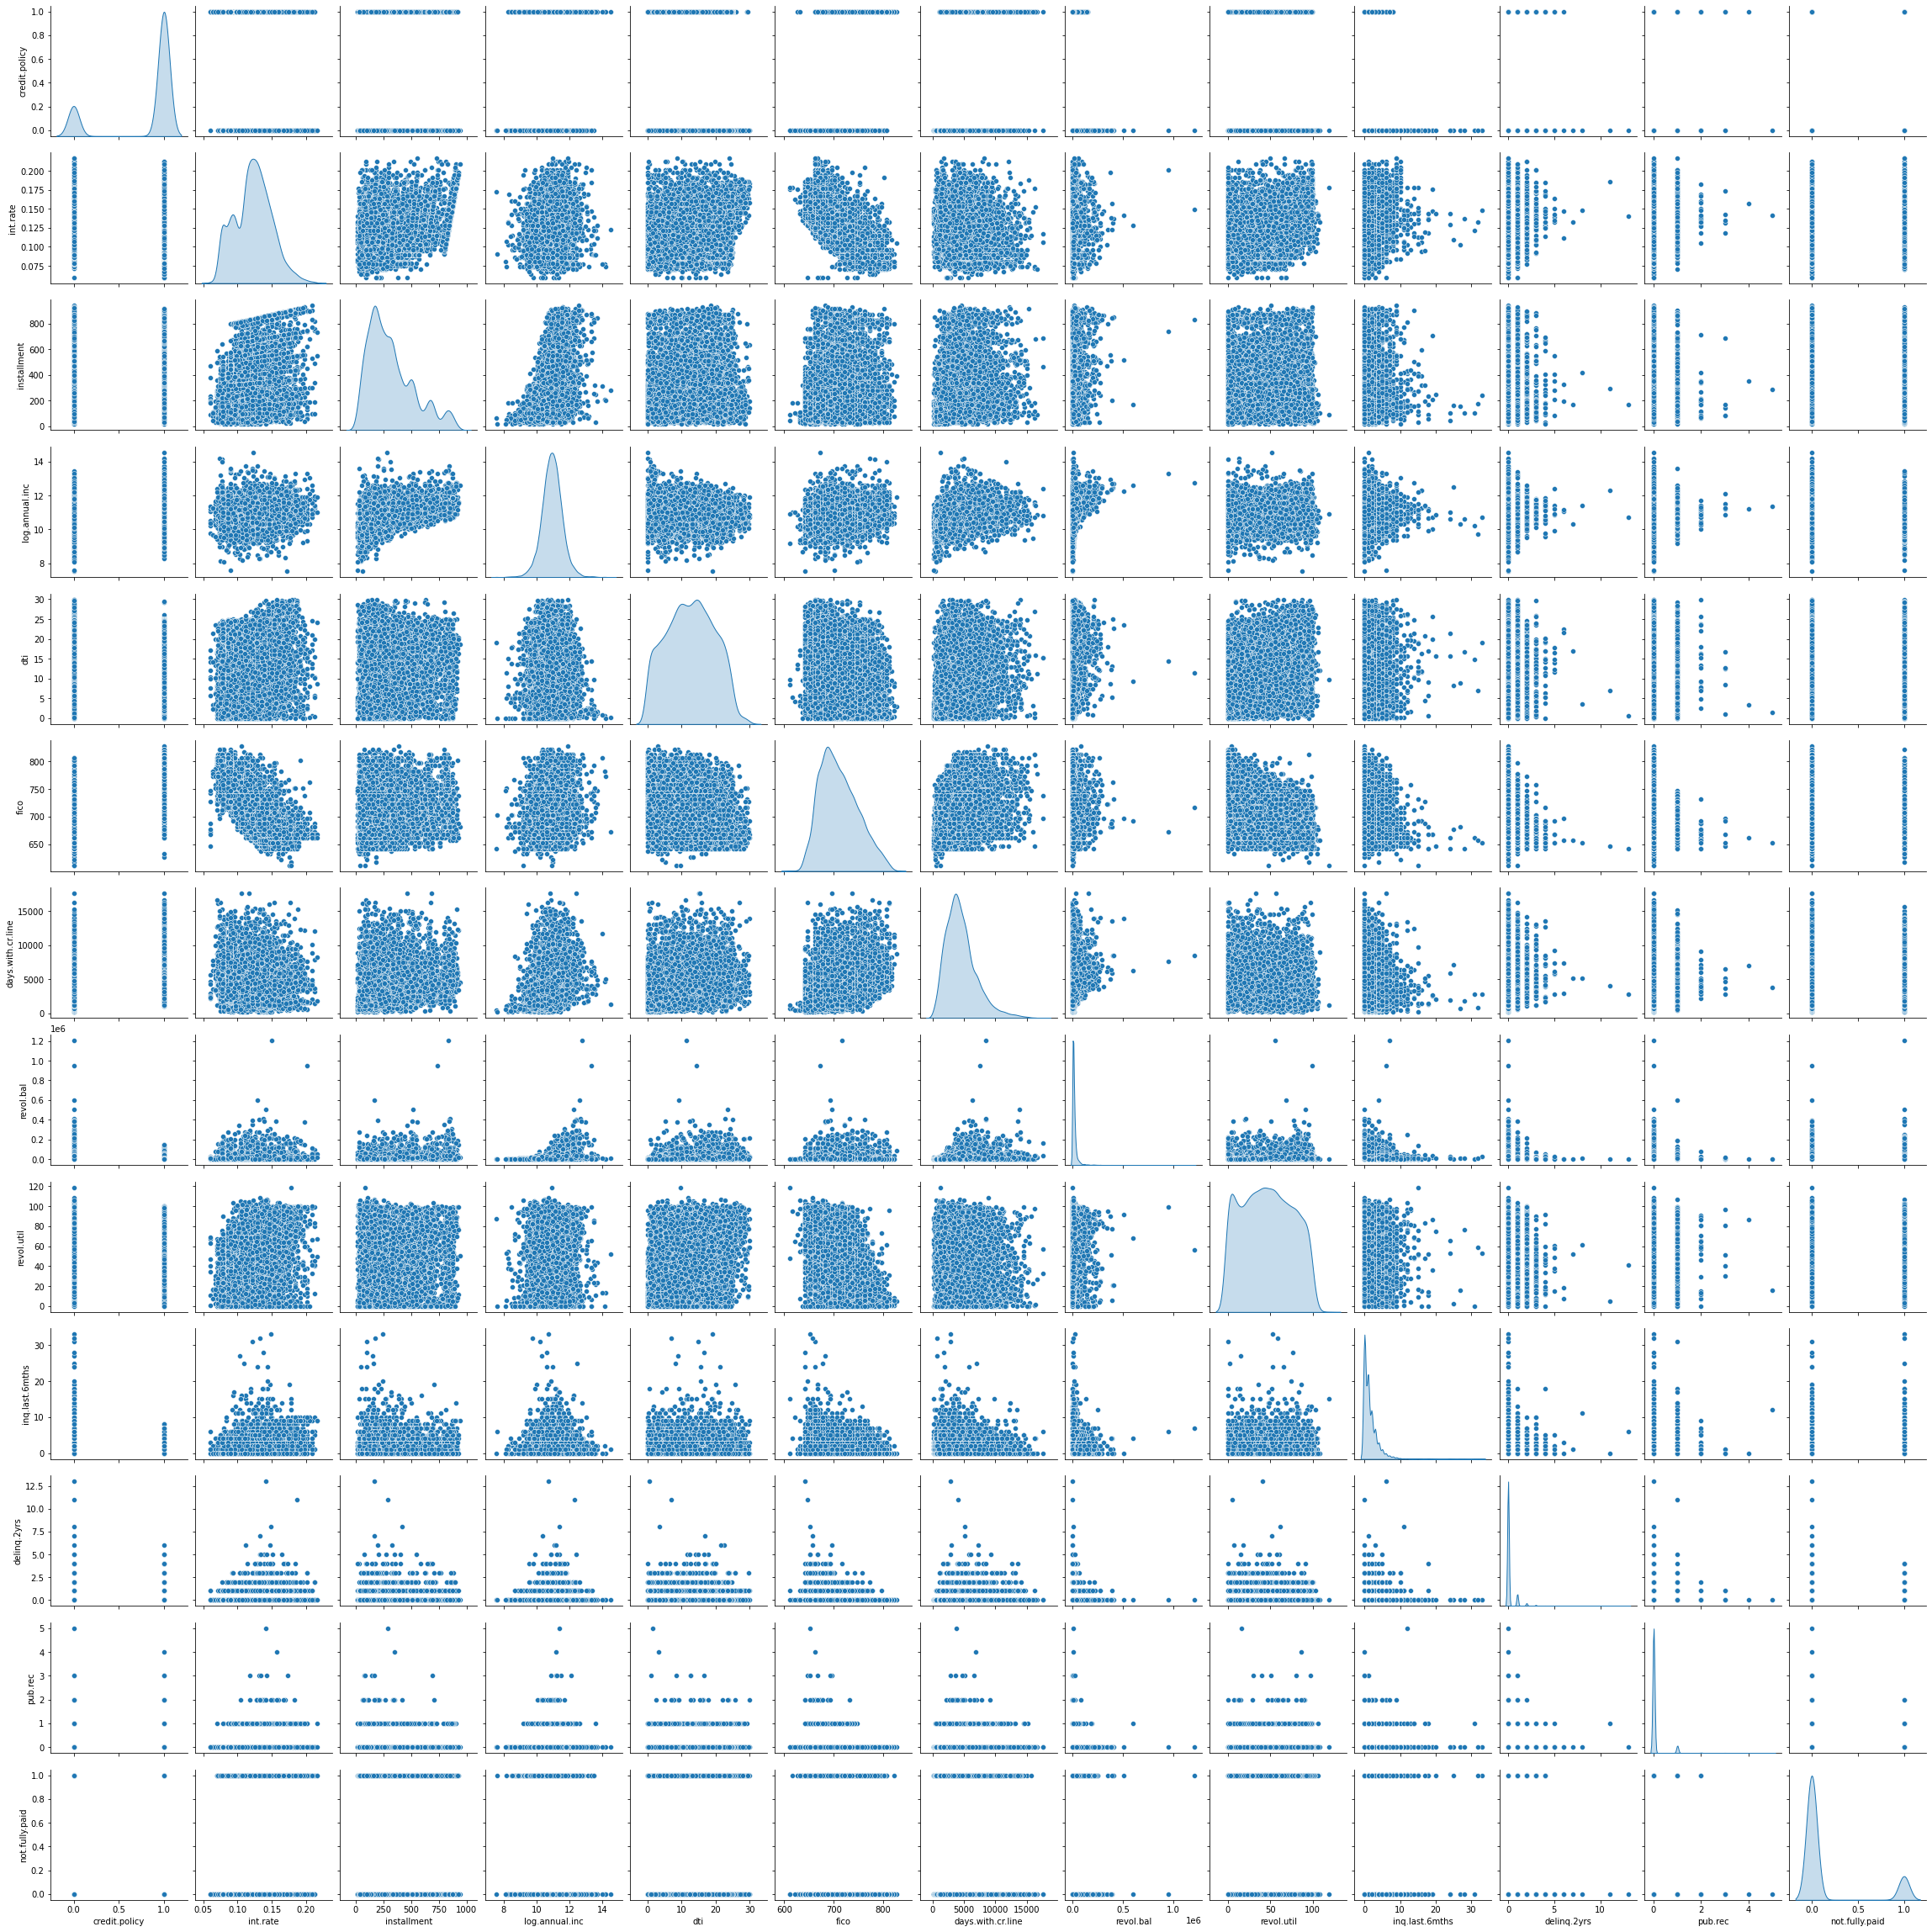

In [29]:
# pair plot
thrs = 0.8
filt1 = np.abs(corr_matrix["Target"])<=thrs
correlation_features = corr_matrix.columns[filt1].tolist()
sns.pairplot(df[correlation_features], diag_kind="kde")
plt.show()

# 1.8 Box Plot (we can see outliers)

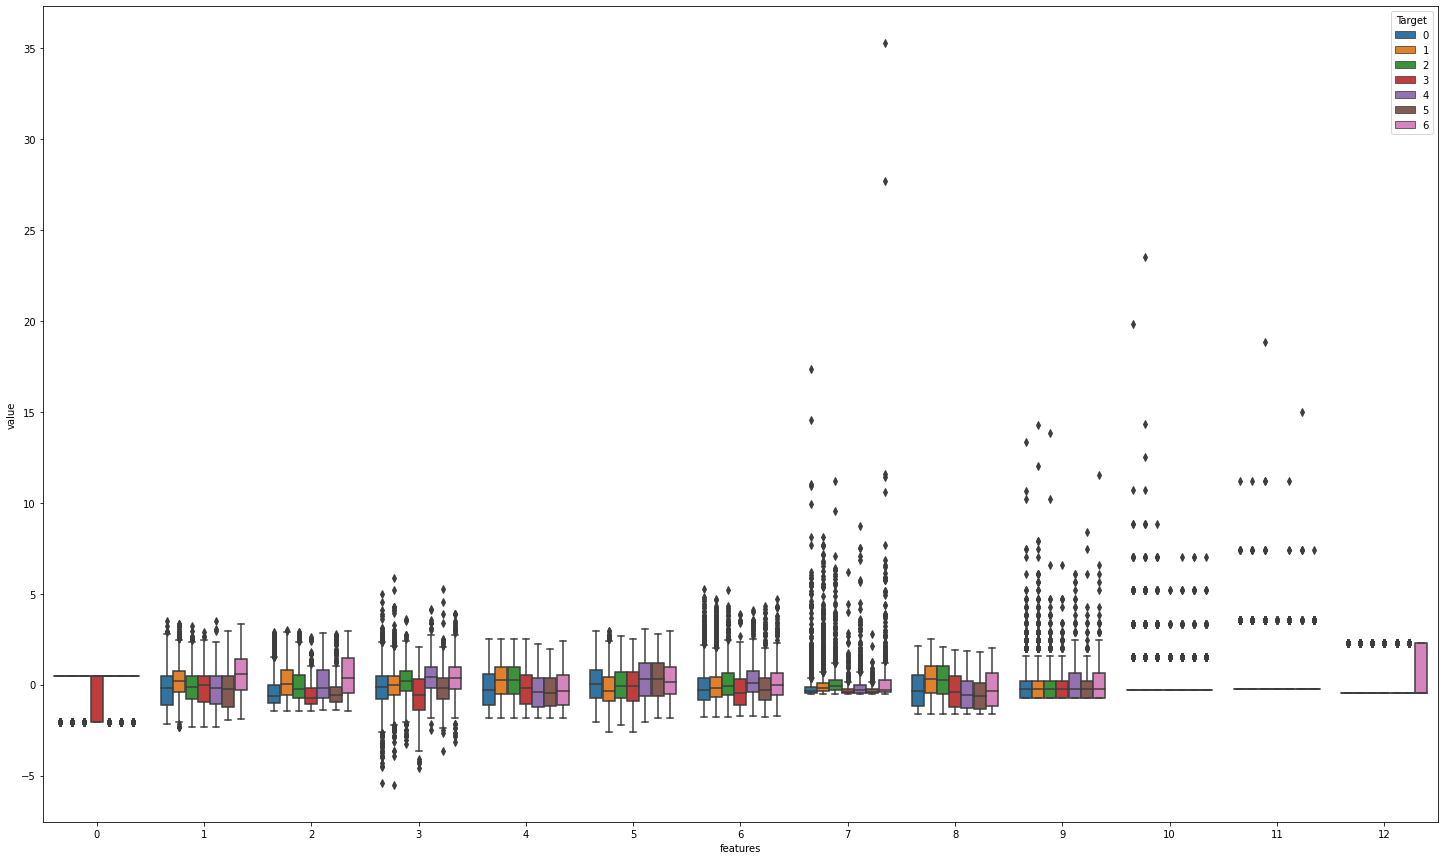

In [30]:
# We only used StandardScaler for visualization.

Y_visualization = df["Target"]
X_visualization = df.drop("Target",axis = 1)

scaler_visualization = StandardScaler()
X_visualization = scaler_visualization.fit_transform(X_visualization)

df_visualization = pd.DataFrame(X_visualization)
df_visualization["Target"] = Y_visualization


df_melted = pd.melt(df_visualization,id_vars="Target",var_name="features",value_name="value")
plt.figure(figsize=(25,15))
sns.boxplot(x="features",y="value",hue="Target",data=df_melted)
plt.show()

# 1.9 Count Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



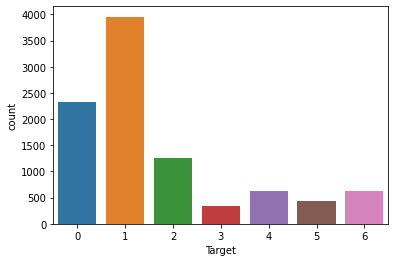

In [31]:
sns.countplot(df["Target"])
plt.show()

# **2- Data Preparation**

# 2-1 Fill Missing Values With Mode

In [32]:
# Don't exit missing value

# 2-2 Outlier Detection (LOF)

In [33]:
y = df["Target"]
X = df.drop(["Target"],axis=1)
columns = X.columns.tolist()

We have 146 Outlier and 9432 Inlier Values


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



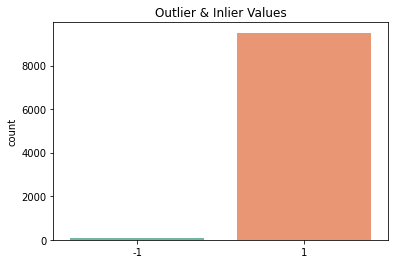

In [34]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)
outlier = len(y_pred)-(y_pred.sum())
inlier = len(y_pred)-outlier

print("We have {} Outlier and {} Inlier Values".format(outlier,inlier))
sns.countplot(y_pred,palette="Set2")
plt.title("Outlier & Inlier Values")
plt.show()

In [35]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [36]:
np.abs(outlier_score["score"]).sort_values(ascending=False).head(10)

9535    12.850555
9042     9.347113
9307     5.037679
9149     3.621636
8034     2.572052
7987     2.508543
8262     2.441545
9142     2.423546
9279     2.368962
9564     2.329981
Name: score, dtype: float64

In [37]:
thresh = -2.5
filt = outlier_score["score"] < thresh
outlier_index = outlier_score[filt].index.tolist()

# Radius for our outliers
Normal_Nucleoli = (X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["Normal_Nucleoli"] = Normal_Nucleoli

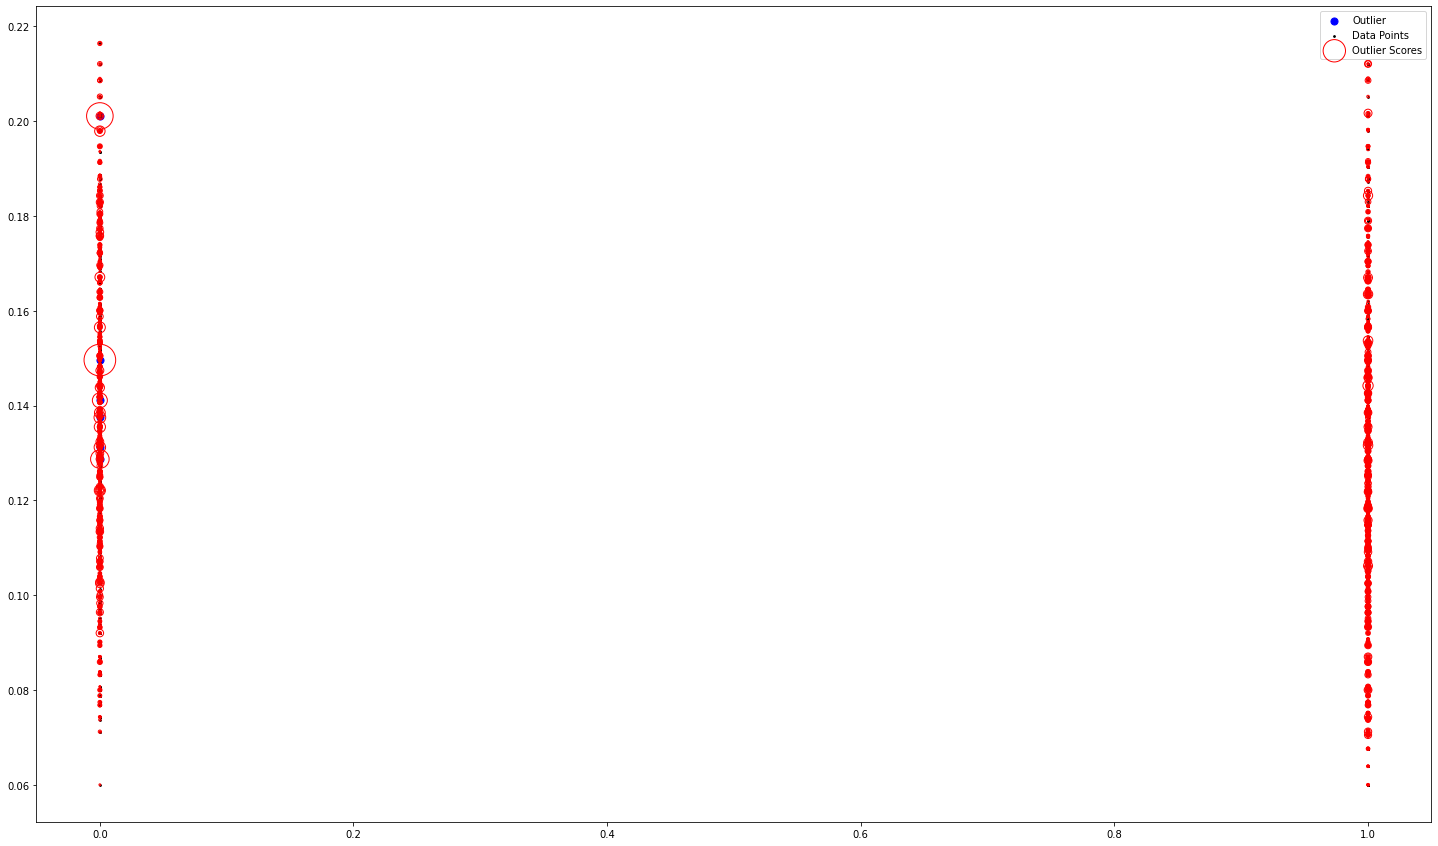

In [38]:
plt.figure(figsize=(25,15))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,1],color = "blue",s=50, label = "Outlier")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k",s=3, label = "Data Points")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k",s=1000*Normal_Nucleoli,edgecolors="r",facecolors="none", label = "Outlier Scores")
plt.legend()
plt.show()

# 2.3 Skewness & Data Transformation & PowerTransformer

In [39]:
y = df["Target"]
X = df.drop(["Target"],axis=1)
columns = X.columns.tolist()
X.head(5)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [43]:
skewed = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed, columns=["skewness"])
print("Before:",skewness)

pt = PowerTransformer(standardize=False, copy=False)
pt.fit_transform(X["revol.bal"].values.reshape(-1, 1))

skewed = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed, columns=["skewness"])
print("After:",skewness)

Before:                     skewness
revol.bal          11.159310
delinq.2yrs         6.060844
pub.rec             5.125632
inq.last.6mths      3.583590
not.fully.paid      1.854301
days.with.cr.line   1.155567
installment         0.912380
fico                0.471186
int.rate            0.164394
revol.util          0.059976
log.annual.inc      0.028664
dti                 0.023937
credit.policy      -1.539380
After:                     skewness
revol.bal          11.159310
delinq.2yrs         6.060844
pub.rec             5.125632
inq.last.6mths      3.583590
not.fully.paid      1.854301
days.with.cr.line   1.155567
installment         0.912380
fico                0.471186
int.rate            0.164394
revol.util          0.059976
log.annual.inc      0.028664
dti                 0.023937
credit.policy      -1.539380


# 2.4 Create Train and Test Dataset

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 2.5 Standardization

In [45]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test) 

# **3. Modeling and Evalution**

# 3.1 PCA

In [46]:
scaler2 = RobustScaler()
x_scaled = scaler2.fit_transform(X)

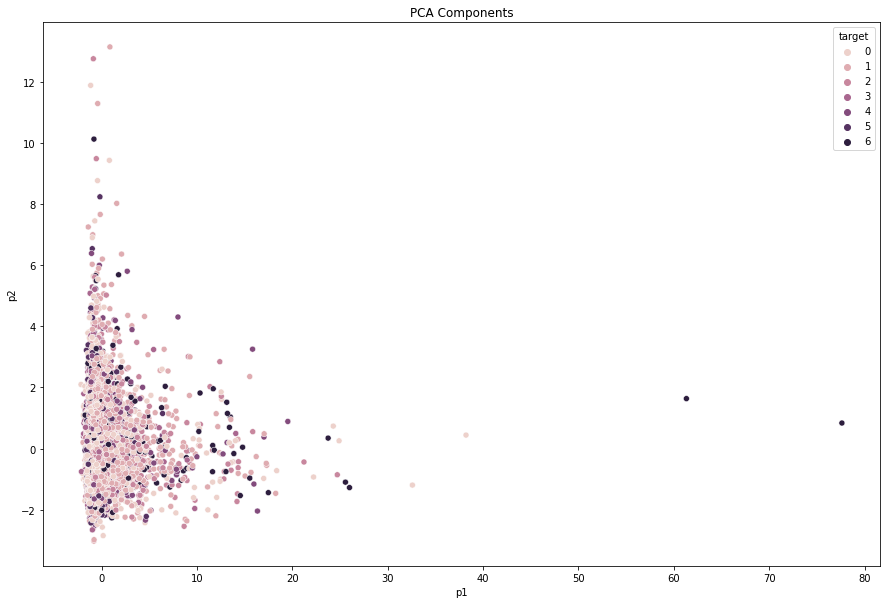

In [47]:
pca = PCA(n_components=2,random_state=42)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
pca_df = pd.DataFrame(x_pca,columns=["p1", "p2"])
pca_df["target"] = y

plt.figure(figsize=(15,10))
sns.scatterplot(x="p1", y="p2", hue="target",data=pca_df)
plt.title("PCA Components")
plt.show()

In [48]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(x_pca,y,test_size=0.33,random_state=42)

# 3.2 K Nearest Neighbors model

In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train,y_train)

KNN_predictions_train = KNN_model.predict(x_train)
KNN_predictions_test = KNN_model.predict(x_test)

acc_test = accuracy_score(y_test, KNN_predictions_test)
acc_train = accuracy_score(y_train, KNN_predictions_train)
print("Test Score : {}, Train Score : {}".format(acc_test, acc_train))

print("Conf Matrix Train\n", confusion_matrix(y_train,KNN_predictions_train))
print(classification_report(y_train,KNN_predictions_train))
print('\n')
print("Conf Matrix Test\n", confusion_matrix(y_test,KNN_predictions_test))
print(classification_report(y_test,KNN_predictions_test))

Test Score : 0.33628598544764315, Train Score : 1.0
Conf Matrix Train
 [[1600    0    0    0    0    0    0]
 [   0 2636    0    0    0    0    0]
 [   0    0  821    0    0    0    0]
 [   0    0    0  228    0    0    0]
 [   0    0    0    0  415    0    0]
 [   0    0    0    0    0  303    0]
 [   0    0    0    0    0    0  414]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       1.00      1.00      1.00      2636
           2       1.00      1.00      1.00       821
           3       1.00      1.00      1.00       228
           4       1.00      1.00      1.00       415
           5       1.00      1.00      1.00       303
           6       1.00      1.00      1.00       414

    accuracy                           1.00      6417
   macro avg       1.00      1.00      1.00      6417
weighted avg       1.00      1.00      1.00      6417



Conf Matrix Test
 [[214 276  85  31  58  43  24]
 [245 688 190 

# 3.2 K Nearest Neighbors model & PCA & Fine-tune Hyper-Parameter

In [51]:
def KNN_Best_params(x_train,x_test,y_train,y_test):

    k_range = list(range(1,31))
    weight_potions = ["uniform","distance"]
    print()
    param_grid = {'n_neighbors': k_range, 'weights': weight_potions}

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print("Optimization parameters: {} ".format(grid.best_params_))
    print()

    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print("Test accuracy : {}, Train accuracy : {}".format(acc_test, acc_train))
    print()

    print('\n')
    print("Conf Matrix Train\n", cm_train)
    print(classification_report(y_train,y_pred_train))
    print('\n')
    print("Conf Matrix Test\n", cm_test)
    print(classification_report(y_test,y_pred_test))

    return grid
grid_knn_pca = KNN_Best_params(x_train_pca,x_test_pca,y_train_pca,y_test_pca)


Optimization parameters: {'n_neighbors': 27, 'weights': 'uniform'} 

Test accuracy : 0.43910155014236, Train accuracy : 0.46392395200249337



Conf Matrix Train
 [[ 770  821    9    0    0    0    0]
 [ 434 2191    9    0    0    2    0]
 [ 146  660   15    0    0    0    0]
 [ 115  113    0    0    0    0    0]
 [ 127  283    4    0    0    1    0]
 [ 152  146    4    0    0    1    0]
 [ 110  293    9    0    0    2    0]]
              precision    recall  f1-score   support

           0       0.42      0.48      0.45      1600
           1       0.49      0.83      0.61      2636
           2       0.30      0.02      0.03       821
           3       0.00      0.00      0.00       228
           4       0.00      0.00      0.00       415
           5       0.17      0.00      0.01       303
           6       0.00      0.00      0.00       414

    accuracy                           0.46      6417
   macro avg       0.20      0.19      0.16      6417
weighted avg       0.35     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

# 3.3 Support Vector Classifier model

In [67]:
# x_train_pca,x_test_pca,y_train_pca,y_test_pca
from sklearn.svm import SVC
SV_model = SVC()
SV_model.fit(x_train,y_train)
predictions = SV_model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[ 333  395    0    0    0    0    3]
 [ 183 1133    0    0    1    0    4]
 [  88  353    0    0    0    0    0]
 [  61   53    0    0    0    0    1]
 [  95  115    0    0    1    0    3]
 [  76   56    0    0    0    0    2]
 [  48  121    0    0    0    0   36]]


              precision    recall  f1-score   support

           0       0.38      0.46      0.41       731
           1       0.51      0.86      0.64      1321
           2       0.00      0.00      0.00       441
           3       0.00      0.00      0.00       115
           4       0.50      0.00      0.01       214
           5       0.00      0.00      0.00       134
           6       0.73      0.18      0.28       205

    accuracy                           0.48      3161
   macro avg       0.30      0.21      0.19      3161
weighted avg       0.38      0.48      0.38      3161



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# 3.3 Support Vector Classifier model & Fine-tun Hyperparameter

In [68]:
from sklearn.svm import SVC
svc_params = {"C": np.arange(1,10)}
svc = SVC(kernel = "linear")
svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [69]:
predictions = svc_cv_model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 307  418    0    0    0    0    6]
 [ 167 1149    0    0    0    0    5]
 [  84  356    0    0    0    0    1]
 [  55   58    0    0    0    0    2]
 [  87  123    0    0    0    0    4]
 [  71   63    0    0    0    0    0]
 [  42  126    0    0    0    0   37]]


              precision    recall  f1-score   support

           0       0.38      0.42      0.40       731
           1       0.50      0.87      0.64      1321
           2       0.00      0.00      0.00       441
           3       0.00      0.00      0.00       115
           4       0.00      0.00      0.00       214
           5       0.00      0.00      0.00       134
           6       0.67      0.18      0.28       205

    accuracy                           0.47      3161
   macro avg       0.22      0.21      0.19      3161
weighted avg       0.34      0.47      0.38      3161



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# 3.4 LOGISTIC REGRESSION

In [55]:
# logistic regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=42,max_iter=10000)
logr.fit(x_train,y_train)

y_pred_logr_test = logr.predict(x_test)

logr_cm_test = confusion_matrix(y_test,y_pred_logr_test)
logr_acc = metrics.accuracy_score(y_test, y_pred_logr_test)
print("Test accuracy is: ", logr_acc)

print('\n')
print("Conf Matrix Test\n", logr_cm_test)
print(classification_report(y_test,y_pred_logr_test))

Test accuracy is:  0.47959506485289466


Conf Matrix Test
 [[ 324  388    3    0    3    0   13]
 [ 169 1135    0    0    5    0   12]
 [  97  337    3    0    1    0    3]
 [  56   57    0    0    0    0    2]
 [  95  108    0    0    4    0    7]
 [  73   60    0    0    0    0    1]
 [  37  116    1    0    1    0   50]]
              precision    recall  f1-score   support

           0       0.38      0.44      0.41       731
           1       0.52      0.86      0.64      1321
           2       0.43      0.01      0.01       441
           3       0.00      0.00      0.00       115
           4       0.29      0.02      0.04       214
           5       0.00      0.00      0.00       134
           6       0.57      0.24      0.34       205

    accuracy                           0.48      3161
   macro avg       0.31      0.22      0.21      3161
weighted avg       0.42      0.48      0.39      3161



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# 3.4 LOGISTIC REGRESSION & Fine-tune hyperparameter

In [57]:
from sklearn.linear_model import LogisticRegression
def Logistic_Regression_Best_params(x_train,x_test,y_train,y_test):

    C = np.logspace(-4, 4, 50)
    penalty = ['l1', 'l2']
    max_iter = list(range(1000, 2000, 1000))
    random_state = 42
    print("*************************************************************")
    param_grid = {"C": C, "penalty": penalty, "max_iter": max_iter}

    logr = LogisticRegression(random_state=random_state)
    grid = GridSearchCV(logr, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print("Optimizatio parameters are : {} ".format(grid.best_params_))
    print("*************************************************************")

    logr = LogisticRegression(**grid.best_params_)
    logr.fit(x_train, y_train)

    y_pred_test = logr.predict(x_test)
    y_pred_train = logr.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print("Test accuracy : {}, Train accuracy : {}".format(acc_test, acc_train))

    print('\n')
    print("Conf Matrix Train\n", cm_train)
    print(classification_report(y_train,y_pred_train))
    print('\n')
    print("Conf Matrix Test\n", cm_test)
    print(classification_report(y_test,y_pred_test))


Logistic_Regression_Best_params(x_train,x_test,y_train,y_test)

*************************************************************


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

Optimizatio parameters are : {'C': 0.12648552168552957, 'max_iter': 1000, 'penalty': 'l2'} 
*************************************************************
Test accuracy : 0.4780132869345144, Train accuracy : 0.4667290010908524


Conf Matrix Train
 [[ 705  849    5    1   13    0   27]
 [ 414 2191    3    0    4    0   24]
 [ 166  638    7    1    1    0    8]
 [  99  128    0    0    0    0    1]
 [ 152  235    2    0    7    0   19]
 [ 149  144    0    0    2    0    8]
 [  97  225    0    0    7    0   85]]
              precision    recall  f1-score   support

           0       0.40      0.44      0.42      1600
           1       0.50      0.83      0.62      2636
           2       0.41      0.01      0.02       821
           3       0.00      0.00      0.00       228
           4       0.21      0.02      0.03       415
           5       0.00      0.00      0.00       303
           6       0.49      0.21      0.29       414

    accuracy                           0.47      641

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

# 3.5 Decision Tree

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

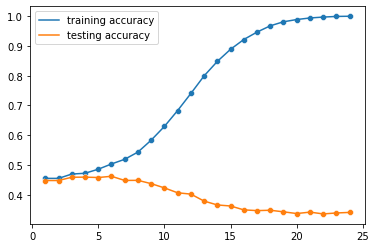

In [58]:
from sklearn.tree import DecisionTreeClassifier

depth = range(1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    tree.fit(x_train, y_train)
    
    y_predict_train = tree.predict(x_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(x_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i
sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)
sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [59]:
print('This is the best depth for Decision Tree Classifier: ', best_depth, '\nAccuracy score is: ', score)
tree = DecisionTreeClassifier(max_depth = best_depth, criterion = 'entropy')
tree.fit(x_train, y_train)
    
y_predict_train = tree.predict(x_train)
training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
y_predict_test = tree.predict(x_test)
acc_score = accuracy_score(y_test,y_predict_test)
print(classification_report(y_test,y_predict_test))

This is the best depth for Decision Tree Classifier:  6 
Accuracy score is:  0.4625118633343879
              precision    recall  f1-score   support

           0       0.37      0.47      0.41       731
           1       0.52      0.81      0.63      1321
           2       0.23      0.04      0.07       441
           3       0.00      0.00      0.00       115
           4       0.17      0.01      0.03       214
           5       0.50      0.01      0.01       134
           6       0.45      0.12      0.19       205

    accuracy                           0.46      3161
   macro avg       0.32      0.21      0.19      3161
weighted avg       0.40      0.46      0.38      3161



# 3.5 Decision Tree & PCA & Fine-tune

In [63]:
from sklearn.model_selection import StratifiedKFold
tree = DecisionTreeClassifier(max_depth = 3, random_state = 3030)
hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [3, 9, 13, 15, 17],
    'class_weight': ['balanced'],
    'random_state': [3030]
}

grid = GridSearchCV(
                tree,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=3030),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [3, 9, 13, 15, 17],
                         'random_state': [3030],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [64]:
print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score nan
best param {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'random_state': 3030, 'splitter': 'best'}


# 3.6 Bagging Model

In [65]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=tree,
                       n_estimators=100,
                       random_state=0)
bag = bag.fit(x_train, y_train)

y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")

Bagging train/test accuracies:  0.480/ 0.467


# 3.6 Bagging Model & PCA

In [66]:
bag = BaggingClassifier(base_estimator=tree,
                       n_estimators=100,
                       random_state=0)
bag = bag.fit(x_train_pca, y_train_pca)

y_train_pred = bag.predict(x_train_pca)
y_test_pred = bag.predict(x_test_pca)

bag_train = accuracy_score(y_train_pca , y_train_pred)
bag_test = accuracy_score(y_test_pca, y_test_pred)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")

Bagging train/test accuracies:  0.457/ 0.450
